# Graphs

Seven Bridges of Königsberg: Leonhard Euler in 1736:
```
devise a walk through the city that would cross each of those bridges once and only once
```

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/7_bridges.svg/269px-7_bridges.svg.png) $\rightarrow$
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/K%C3%B6nigsberg_graph.svg/270px-K%C3%B6nigsberg_graph.svg.png)

$G = (V, E)$

$e\in E: \{(v_i, v_j): v_iRv_j\}$ - directed graph (digraph)

$e\in E: \{\{v_i, v_j\}: v_iRv_j \land v_jRv_i\}$ - undirected graph

$\exists W:E \rightarrow \mathbb{R}$ - weighted graph

$e = (v_i, v_i)$ - loop

$E$ - set with no loops $\Rightarrow$ $G$ - simple graph

$E$ - multiset $\Rightarrow$ $G$ - multigraph

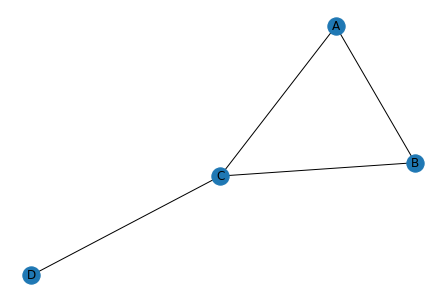

In [83]:
import networkx as nx 
import matplotlib.pyplot as plt

V = ["A", "B", "C", "D"]
E = [(V[0], V[1]), 
     (V[1], V[2]), 
     (V[2], V[3]), 
     (V[0], V[2])
    ]
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)
nx.draw(G, with_labels=True)
plt.show()

C:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


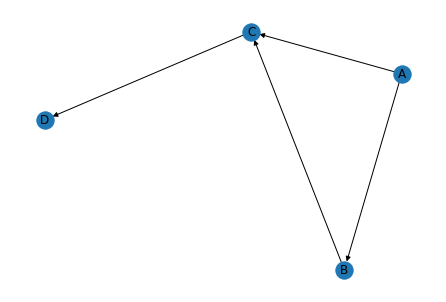

In [24]:
V = ["A", "B", "C", "D"]
E = [(V[0], V[1]), 
     (V[1], V[2]), 
     (V[2], V[3]), 
     (V[0], V[2])
    ]
G = nx.DiGraph()
G.add_nodes_from(V)
G.add_edges_from(E)
nx.draw(G, with_labels=True)
plt.show()

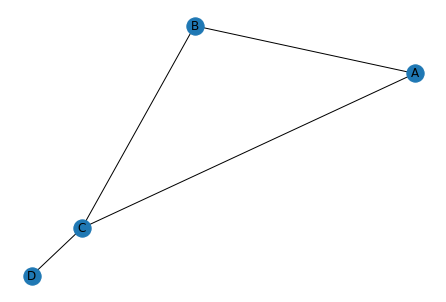

In [37]:
V = ["A", "B", "C", "D"]
E = [(V[0], V[1], 6), 
     (V[1], V[2], 7), 
     (V[2], V[3], 2), 
     (V[0], V[2], 10)
    ]
G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
layout = nx.kamada_kawai_layout(G) 
    # nx.spring_layout(G) - bigger is closer
nx.draw(G, layout, with_labels=True)
plt.show()

## Problems

How many edges can **simple directed graph** have?

How many edges can **simple undirected graph** have?

$max|E| = ?$


# Terms
- **adjacent** nodes and **incident** edges.
- vertex **degree** and graph degree. 
- **Node (vertex); Edge; Walk (Open/Closed); Trail; Circuit; Cycle; Simple path**

![](img/graphs.png)

- **Connected** graph, components

![](https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg)

- **Tree** - connected graph without cycles; **Forest** - graph without cycles
- **Bridge** - an edge, being removed, increases the number of connected components

[Some more terms](http://www.people.vcu.edu/~gasmerom/MAT131/graphs.html)

## Handshaking lemma 

```Every finite undirected graph has an even number of vertices with odd degree```

${\displaystyle \sum _{v\in V}\deg v=2|E|}$

Proof is done by **double counting**.

## Problems

There is a graph with 4 persons.
- Person $A$ has 1 friend
- Person $B$ has 2 friends
- Person $C$ has 3 friends
How many friends could person $D$ have?


# Euler and Hamiltonian graphs

## Euler graph

An *Eulerian cycle*, *Eulerian circuit* or *Euler tour* in an undirected graph is a cycle that uses each edge exactly once. *Eulerian trail/walk* - trail with the same properties.

This object is widely used in optimization tasks.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/K%C3%B6nigsberg_graph.svg/248px-K%C3%B6nigsberg_graph.svg.png)

So, can we cross each bridge exactly once?

### Euler's Theorem:
```
A connected graph has an Euler cycle if and only if every vertex has even degree.
A connected graph has an Euler path if and only if only 0 or 2 vertices has odd degree.

```

To find an Euler path or an Euler circuit:
- Make sure the graph has either 0 or 2 odd vertices.
- If there are 0 odd vertices, start anywhere. If there are 2 odd vertices, start at one of them.
- Follow edges one at a time. If you have a choice between a bridge and a non-bridge, always choose the non-bridge.
- Stop when you run out of edges. 

# Problems

Find an Eulerian path/cycle

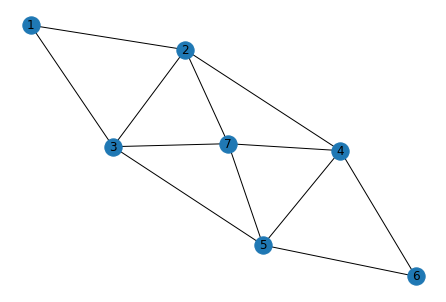

In [46]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([
        (1, 2), (1, 3), (2, 3),
        (2, 4), (2, 7), (7, 5),
        (3, 5), (3, 7), (7, 4),
        (4, 5), (4, 6), (5, 6)
    ])
nx.draw(G, with_labels=True)
plt.show()

## Hamiltonian graph
A *Hamiltonian path* (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A *Hamiltonian cycle* (or Hamiltonian circuit) is a Hamiltonian path that is a cycle.

Determining whether such paths and cycles exist in graphs is one of the most complex problems.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Hamiltonian_path.svg/1024px-Hamiltonian_path.svg.png" width="200"/>

What we can do, apply some criteria

### Necessary only
No node $x_i$ with $deg(x_i)<2$. (Proof from def).

### Posh sufficient
A simple graph with *n* vertices (*n* ≥ 3), $\forall m: m = 1 .. \frac{n-1}{2}$, number of vertices with a degree less or equal to *m* is less then *m*.

### Dirac sufficient
A simple graph with *n* vertices (*n* ≥ 3) is Hamiltonian if every vertex has degree *n* / 2 or greater.
### Ore sufficient
A simple graph with *n* vertices (*n* ≥ 3) is Hamiltonian if, for every pair of non-adjacent vertices, the sum of their degrees is *n* or greater.

## Problem

For a fully connected undirected weighted graph with 30 vertices estimate time to solve a travelling salesman problem (cycle). Time to process a single option is `1ms`.